## ANDERSON ANDREY QUITIAN PEREZ 

## REGRESION LOGISTICA 

In [3]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#Lectura de datos crear variable
Datos = pd.read_csv('C:/UNAD_TAREA_3/BD/heart_cleveland_upload.csv')

In [7]:
#Lectura de datos y análisis correspondiente 
Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [9]:
# Descripción Media,mediana,moa,etc...
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Análisis de datos atípicos del colesterol ')

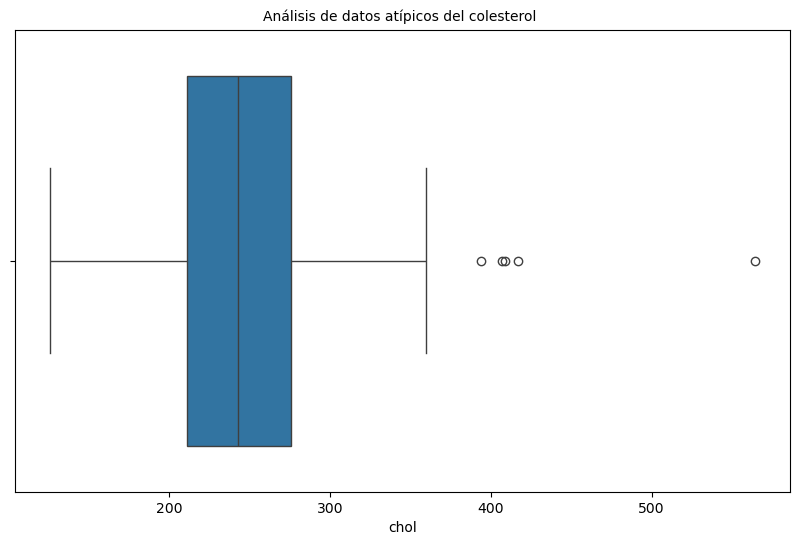

In [11]:
#Datos faltantes y atípicos 
plt.figure(figsize=(10, 6))
sns.boxplot(x=Datos['chol'])
plt.title('Análisis de datos atípicos del colesterol ', fontsize=10 )

Text(0.5, 1.0, 'Análisis de datos atípicos a pacientes con dolor en el pecho ')

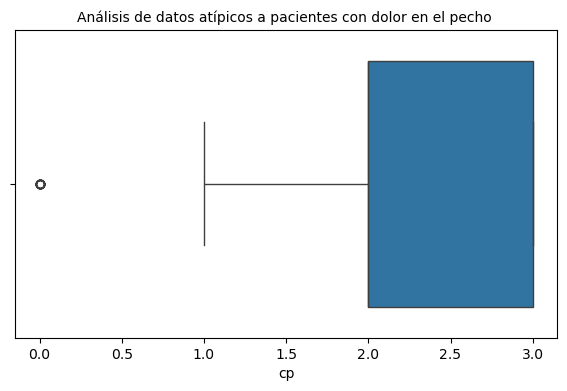

In [13]:
#Datos faltantes y atípicos 
plt.figure(figsize=(7, 4))
sns.boxplot(x=Datos['cp'])
plt.title('Análisis de datos atípicos a pacientes con dolor en el pecho ', fontsize=10 )

Text(0.5, 1.0, 'Análisis de datos atípicos a pacientes con cardiopatía ')

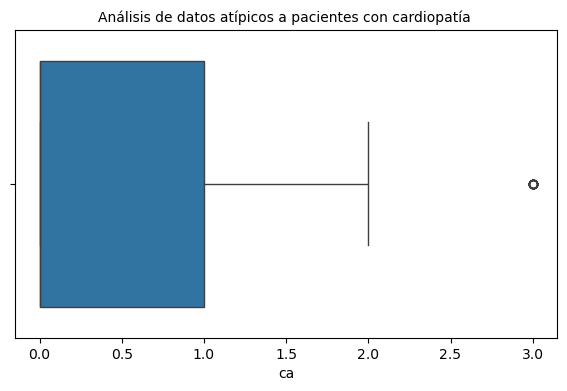

In [15]:
#Datos faltantes y atípicos 
plt.figure(figsize=(7, 4))
sns.boxplot(x=Datos['ca'])
plt.title('Análisis de datos atípicos a pacientes con cardiopatía ', fontsize=10 )

Text(0.5, 1.0, 'Análisis de datos atípicos a pacientes con condición en el estado de salud ')

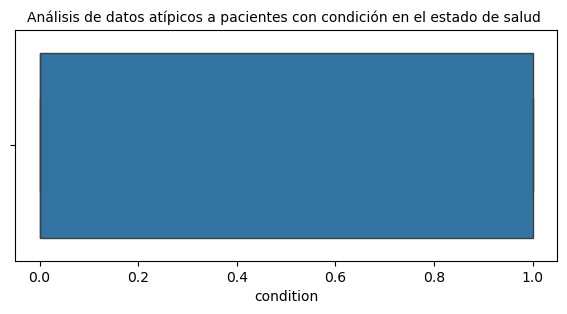

In [17]:
#Datos faltantes y atípicos 
plt.figure(figsize=(7, 3))
sns.boxplot(x=Datos['condition'])
plt.title('Análisis de datos atípicos a pacientes con condición en el estado de salud ', fontsize=10 )

Text(0.5, 1.0, 'Análisis de datos atípicos a pacientes con frecuencia cardiaca máxima ')

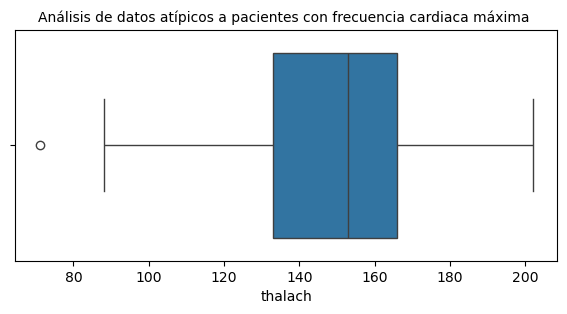

In [19]:
#Datos faltantes y atípicos 
plt.figure(figsize=(7, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Análisis de datos atípicos a pacientes con frecuencia cardiaca máxima ', fontsize=10 )

Text(0.5, 1.0, 'Análisis de datos atípicos a pacientes con glucosa en sangre en ayunas ')

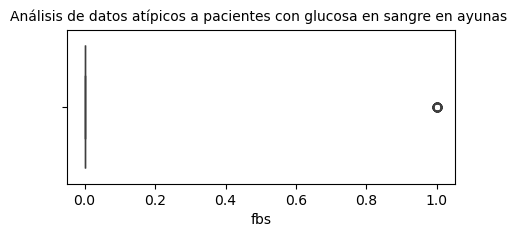

In [21]:
#Datos faltantes y atípicos 
plt.figure(figsize=(5, 2))
sns.boxplot(x=Datos['fbs'])
plt.title('Análisis de datos atípicos a pacientes con glucosa en sangre en ayunas ', fontsize=10 )

In [23]:
#Revisión de datos faltantes
print("Cantidad de Registros con cero en Colesterol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Cardipatía: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en Condición del estado de salud: ",Datos['condition'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardiaca maáxima: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en pacientes con glucsa en sangre en ayunas: ",Datos['fbs'].isin([0]).sum())

Cantidad de Registros con cero en Colesterol:  0
Cantidad de Registros con cero en Cardipatía:  174
Cantidad de Registros con cero en Condición del estado de salud:  160
Cantidad de Registros con cero en Frecuencia cardiaca maáxima:  0
Cantidad de Registros con cero en pacientes con glucsa en sangre en ayunas:  254


In [25]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.
Datos['chol']=Datos['chol'].replace(0,Datos['chol'].mean())
Datos['ca']=Datos['ca'].replace(0,Datos['ca'].mean())
Datos['condition']=Datos['condition'].replace(0,Datos['condition'].mean())
Datos['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())

In [28]:
#Revisión nuevamente de datos faltantes
print("Cantidad de Registros con cero en Colesterol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Cardipatía: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en Condición del estado de salud: ",Datos['condition'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardiaca maáxima: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en pacientes con glucosa en sangre en ayunas: ",Datos['fbs'].isin([0]).sum())

Cantidad de Registros con cero en Colesterol:  0
Cantidad de Registros con cero en Cardipatía:  0
Cantidad de Registros con cero en Condición del estado de salud:  0
Cantidad de Registros con cero en Frecuencia cardiaca maáxima:  0
Cantidad de Registros con cero en pacientes con glucosa en sangre en ayunas:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

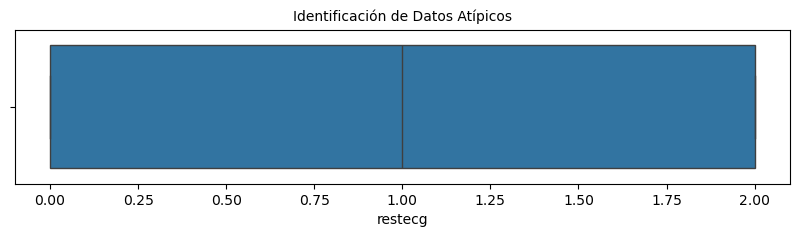

In [30]:
#Identificación de Datos Atípicos
plt.figure(figsize=(10, 2))
sns.boxplot(x=Datos['restecg'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

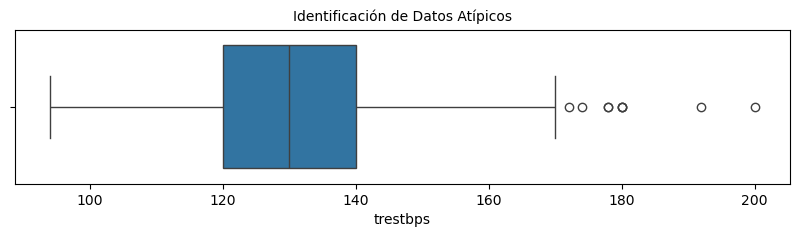

In [32]:
#Identificación de Datos Atípicos
plt.figure(figsize=(10, 2))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [34]:
#Conteo de Datos Atípicos

nivel_minimo=80
nivel_maximo=160
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 15


In [36]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['trestbps']<nivel_maximo)&(Datos['trestbps']>nivel_minimo)]

In [38]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

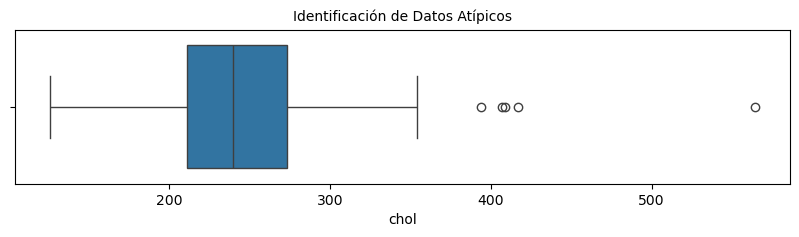

In [40]:
#Identificación de Datos Atípicos
plt.figure(figsize=(10, 2))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [42]:
#Conteo de Datos Atípicos

nivel_minimo=120
nivel_maximo=200
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 225


In [44]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]

In [46]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

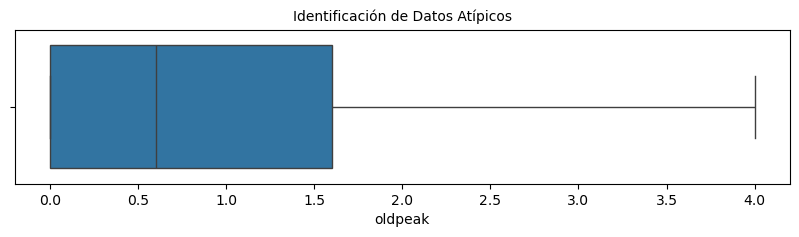

In [48]:
#Identificación de Datos Atípicos(Datos normales grafica de ejemplo donde no se observan datos atípicos)
plt.figure(figsize=(10, 2))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [50]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 14 to 295
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45 non-null     int64  
 1   sex        45 non-null     int64  
 2   cp         45 non-null     int64  
 3   trestbps   45 non-null     int64  
 4   chol       45 non-null     int64  
 5   fbs        45 non-null     float64
 6   restecg    45 non-null     int64  
 7   thalach    45 non-null     int64  
 8   exang      45 non-null     int64  
 9   oldpeak    45 non-null     float64
 10  slope      45 non-null     int64  
 11  ca         45 non-null     float64
 12  thal       45 non-null     int64  
 13  condition  45 non-null     float64
dtypes: float64(4), int64(10)
memory usage: 5.3 KB


In [52]:
# Total de personas con dolor en el pecho

Datos['exang'].value_counts()

exang
0    32
1    13
Name: count, dtype: int64

In [54]:
Datos[['exang']].head(50)

,exang
14,0
15,0
20,1
22,0
27,0
54,0
57,0
65,0
68,0
69,0


In [56]:
# Total mujeres (1) y hombres (0)

Datos['sex'].value_counts()

sex
1    32
0    13
Name: count, dtype: int64

In [58]:
Datos[['sex']].head(30)

,sex
14,1
15,1
20,1
22,1
27,0
54,1
57,0
65,0
68,1
69,1


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo 

In [61]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('cp',axis=1) # Se cargan los datos de train sin los datos de la columna cp (pacientes con dolor en el pecho)
Y = Datos['cp'] # Se cargan los datos de train con los datos de la la columna  cp (pacientes con dolor en el pecho)

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [63]:
print (X_train)

     age  sex  trestbps  chol       fbs  restecg  thalach  exang  oldpeak  \
291   40    1       110   167  0.144781        2      114      1      2.0   
281   44    1       110   197  0.144781        2      177      0      0.0   
127   50    1       129   196  0.144781        0      163      0      0.0   
230   57    1       130   131  0.144781        0      115      1      1.2   
245   54    1       120   188  0.144781        0      113      0      1.4   
157   70    1       145   174  0.144781        0      125      1      2.6   
237   56    1       132   184  0.144781        2      105      1      2.1   
137   44    0       108   141  0.144781        0      175      0      0.6   
135   46    0       142   177  0.144781        2      160      1      1.4   
93    60    1       140   185  0.144781        2      155      0      3.0   
22    34    1       118   182  0.144781        2      174      0      0.0   
116   52    0       136   196  0.144781        2      169      0      0.1   

In [65]:
print (Y_train)

291    3
281    3
127    2
230    3
245    3
157    3
237    3
137    2
135    2
93     2
22     0
116    2
146    2
159    3
104    2
282    3
128    2
129    2
68     1
54     1
57     1
295    3
20     0
15     0
294    3
182    3
72     2
27     1
194    3
211    3
152    2
156    3
184    3
Name: cp, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros 

In [68]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [70]:
print (Y_test)

69     1
65     1
279    3
172    3
223    3
114    2
290    3
218    3
105    2
95     2
120    2
14     0
Name: cp, dtype: int64


In [72]:
print (Prediccion)

[2 2 3 3 2 2 0 2 1 3 2 3]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc 

In [75]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.33      0.50      0.40         4
           3       0.50      0.40      0.44         5

    accuracy                           0.33        12
   macro avg       0.21      0.23      0.21        12
weighted avg       0.32      0.33      0.32        12



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

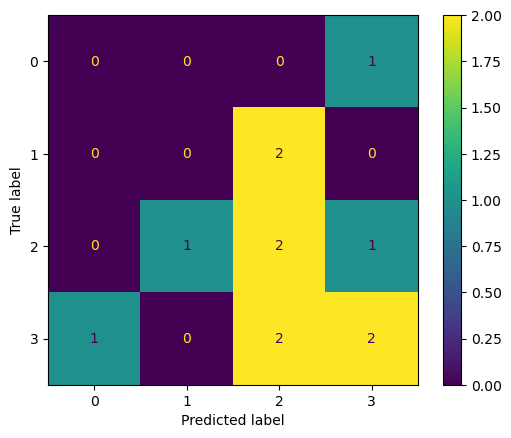

In [78]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## 8. Interpretar, analizar y documentar los resultados obtenidos